<a href="https://colab.research.google.com/github/YaokunLin/Models/blob/main/Tensorflow_NLP_Roar_Katty_Perry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

#data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
data="I used to bite my tongue and hold my breath \n Scared to rock the boat and make a mess \n So I sit quietly \n Agree politely \n I guess that I forgot I had a choice \n I let you push me past the breaking point \n I stood for nothing \n So I fell for everything \n You held me down but I got up \n Already brushing off the dust \n You hear my voice, you hear that sound \n Like thunder, gonna shake the ground \n You held me down but I got up \n Get ready ’cause I’ve had enough \n I see it all, I see it now \n I got the eye of the tiger, a fighter \n Dancing through the fire \n ‘Cause I am a champion \n And you’re gonna hear me roar \n Louder, louder than a lion \n ‘Cause I am a champion \n And you’re gonna hear me roar \n You’re gonna hear me roar \n Now I’m floating like a butterfly \n Stinging like a bee, I earned my stripes \n I went from zero \n To my own hero \n You held me down but I got up \n Already brushing off the dust \n You hear my voice, you hear that sound \n Like thunder, gonna shake the ground \nYou held me down but I got up \n Get ready ’cause I’ve had enough \n I see it all, I see it now \n I got the eye of the tiger, a fighter \n Dancing through the fire \n ‘Cause I am a champion \n And you’re gonna hear me roar \n "

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'i': 1, 'the': 2, 'a': 3, 'you': 4, 'me': 5, 'hear': 6, 'my': 7, 'got': 8, 'gonna': 9, 'and': 10, 'held': 11, 'down': 12, 'but': 13, 'up': 14, 'like': 15, 'see': 16, 'it': 17, 'you’re': 18, 'roar': 19, 'to': 20, 'that': 21, 'had': 22, 'now': 23, '‘cause': 24, 'am': 25, 'champion': 26, 'so': 27, 'for': 28, 'already': 29, 'brushing': 30, 'off': 31, 'dust': 32, 'voice': 33, 'sound': 34, 'thunder': 35, 'shake': 36, 'ground': 37, 'get': 38, 'ready': 39, '’cause': 40, 'i’ve': 41, 'enough': 42, 'all': 43, 'eye': 44, 'of': 45, 'tiger': 46, 'fighter': 47, 'dancing': 48, 'through': 49, 'fire': 50, 'louder': 51, 'used': 52, 'bite': 53, 'tongue': 54, 'hold': 55, 'breath': 56, 'scared': 57, 'rock': 58, 'boat': 59, 'make': 60, 'mess': 61, 'sit': 62, 'quietly': 63, 'agree': 64, 'politely': 65, 'guess': 66, 'forgot': 67, 'choice': 68, 'let': 69, 'push': 70, 'past': 71, 'breaking': 72, 'point': 73, 'stood': 74, 'nothing': 75, 'fell': 76, 'everything': 77, 'than': 78, 'lion': 79, 'i’m': 80, 'floating':

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
#
#print(tokenizer.word_index['in'])
#print(tokenizer.word_index['the'])
#print(tokenizer.word_index['town'])
#print(tokenizer.word_index['of'])
#print(tokenizer.word_index['athy'])
#print(tokenizer.word_index['one'])
#print(tokenizer.word_index['jeremy'])
#print(tokenizer.word_index['lanigan'])
#*/

In [ ]:
print(xs[6])

[ 0  0  1 52 20 53  7 54 10]


In [ ]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[ 0  0  0  1 52 20 53  7 54]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'i': 1, 'the': 2, 'a': 3, 'you': 4, 'me': 5, 'hear': 6, 'my': 7, 'got': 8, 'gonna': 9, 'and': 10, 'held': 11, 'down': 12, 'but': 13, 'up': 14, 'like': 15, 'see': 16, 'it': 17, 'you’re': 18, 'roar': 19, 'to': 20, 'that': 21, 'had': 22, 'now': 23, '‘cause': 24, 'am': 25, 'champion': 26, 'so': 27, 'for': 28, 'already': 29, 'brushing': 30, 'off': 31, 'dust': 32, 'voice': 33, 'sound': 34, 'thunder': 35, 'shake': 36, 'ground': 37, 'get': 38, 'ready': 39, '’cause': 40, 'i’ve': 41, 'enough': 42, 'all': 43, 'eye': 44, 'of': 45, 'tiger': 46, 'fighter': 47, 'dancing': 48, 'through': 49, 'fire': 50, 'louder': 51, 'used': 52, 'bite': 53, 'tongue': 54, 'hold': 55, 'breath': 56, 'scared': 57, 'rock': 58, 'boat': 59, 'make': 60, 'mess': 61, 'sit': 62, 'quietly': 63, 'agree': 64, 'politely': 65, 'guess': 66, 'forgot': 67, 'choice': 68, 'let': 69, 'push': 70, 'past': 71, 'breaking': 72, 'point': 73, 'stood': 74, 'nothing': 75, 'fell': 76, 'everything': 77, 'than': 78, 'lion': 79, 'i’m': 80, 'floating':

In [ ]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
7/7 [==============================] - 2s 6ms/step - loss: 4.5221 - accuracy: 0.0012 
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 4.5046 - accuracy: 0.0664
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 4.4849 - accuracy: 0.0498
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 4.4642 - accuracy: 0.0602
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 4.4209 - accuracy: 0.0573
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 4.3795 - accuracy: 0.0698
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 4.3106 - accuracy: 0.0600
Epoch 8/500
7/7 [==============================] - 0s 5ms/step - loss: 4.2167 - accuracy: 0.0683
Epoch 9/500
7/7 [==============================] - 0s 5ms/step - loss: 4.1300 - accuracy: 0.0641
Epoch 10/500
7/7 [==============================] - 0s 6ms/step - loss: 4.1114 - accuracy: 0.0569
Epoch 11/500
7/7 [==========

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

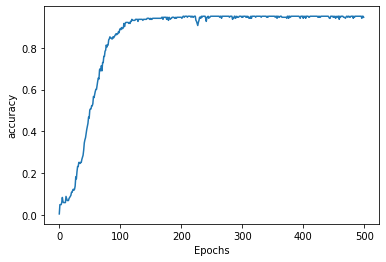

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
seed_text = "You're gonna hear Yao roar"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


You're gonna hear Yao roar got up up got up up up got up up through the point point fighter fighter fighter fighter fighter fighter mess a point mess mess mess mess i’m zero mess mess mess i’m hero mess mess mess mess off the point point point point fighter mess mess a point mess choice mess mess i’m zero mess mess mess i’m hero mess mess mess mess off the point point point point fighter mess mess a point mess choice mess mess i’m zero mess mess mess i’m hero mess mess mess mess off the point point point point fighter mess mess a
